In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Math Performance

In [2]:
data_mat = pd.read_csv("student-mat.csv", sep=';')
data_mat.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


### Data Analyzing and Preprocessing

In [3]:
data_mat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [4]:
#Let's assume that students pass the course if %25(G1) + %25(G2) + %50(G3) >= 10

data_mat['Result'] = 'nan'
data_mat['Average'] = data_mat['G1']*25/100 + data_mat['G2']*25/100 + data_mat['G3']*50/100
for i in range(len(data_mat['Average'])):
    if data_mat['Average'].values[i] >= 10:
        data_mat['Result'].values[i] = 1
    else:
        data_mat['Result'].values[i] = 0
data_mat['Result'] = data_mat['Result'].astype(int)
data_mat.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Dalc,Walc,health,absences,G1,G2,G3,Result,Average
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,1,1,3,6,5,6,6,0,5.75
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,1,1,3,4,5,5,6,0,5.50
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,2,2,3,3,10,7,8,10,0,8.75
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,1,1,5,2,15,14,15,1,14.75
4,GP,F,16,U,GT3,T,3,3,other,other,...,2,1,2,5,4,6,10,10,0,9.00


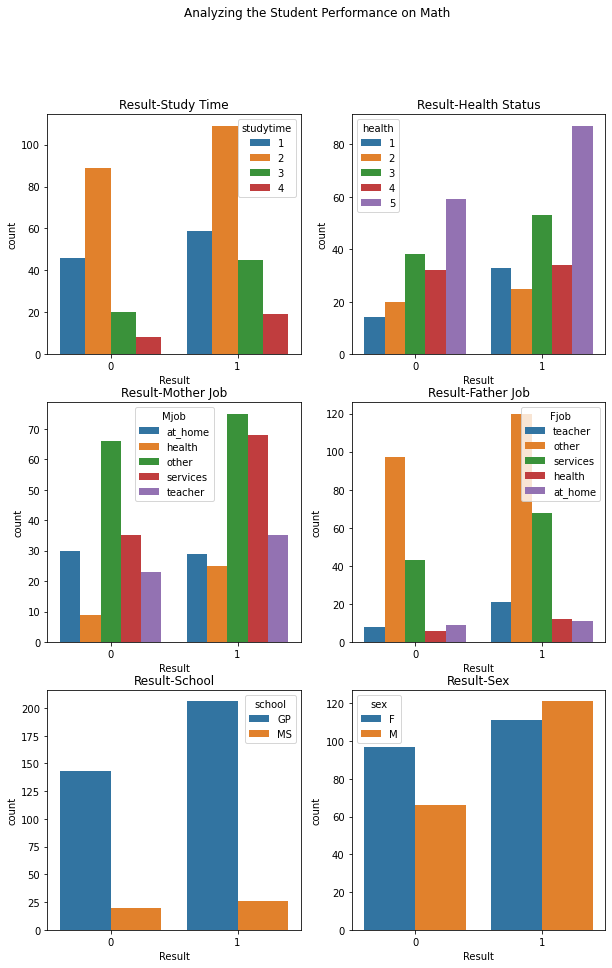

In [5]:
fig, axes = plt.subplots(3, 2, figsize=(10, 15))
fig.suptitle('Analyzing the Student Performance on Math')

sns.countplot(ax=axes[0, 0], data=data_mat, x='Result', hue = 'studytime')
axes[0,0].set_title('Result-Study Time')

sns.countplot(ax=axes[0, 1], data=data_mat, x='Result', hue = 'health')
axes[0,1].set_title('Result-Health Status')

sns.countplot(ax=axes[1, 0], data=data_mat, x='Result', hue = 'Mjob')
axes[1,0].set_title('Result-Mother Job')

sns.countplot(ax=axes[1, 1], data=data_mat, x='Result', hue = 'Fjob')
axes[1,1].set_title('Result-Father Job')

sns.countplot(ax=axes[2, 0], data=data_mat, x='Result', hue = 'school')
axes[2,0].set_title('Result-School')

sns.countplot(ax=axes[2, 1], data=data_mat, x='Result', hue = 'sex')
axes[2,1].set_title('Result-Sex')

plt.show()

In [6]:
for i in range(len(data_mat.columns)):
    if data_mat.dtypes[i] == 'O':
        print(data_mat.columns[i] , ": ", data_mat[data_mat.columns[i]].unique())

school :  ['GP' 'MS']
sex :  ['F' 'M']
address :  ['U' 'R']
famsize :  ['GT3' 'LE3']
Pstatus :  ['A' 'T']
Mjob :  ['at_home' 'health' 'other' 'services' 'teacher']
Fjob :  ['teacher' 'other' 'services' 'health' 'at_home']
reason :  ['course' 'other' 'home' 'reputation']
guardian :  ['mother' 'father' 'other']
schoolsup :  ['yes' 'no']
famsup :  ['no' 'yes']
paid :  ['no' 'yes']
activities :  ['no' 'yes']
nursery :  ['yes' 'no']
higher :  ['yes' 'no']
internet :  ['no' 'yes']
romantic :  ['no' 'yes']


In [7]:
data_mat['school'].replace({
    'GP':0,
    'MS':1
}, inplace=True)

data_mat['sex'].replace({
    'M':0,
    'F':1
}, inplace=True)

data_mat['address'].replace({
    'U':0,
    'R':1
}, inplace=True)

data_mat['famsize'].replace({
    'GT3':0,
    'LE3':1
}, inplace=True)

data_mat['Pstatus'].replace({
    'A':0,
    'T':1
}, inplace=True)

data_mat['Mjob'].replace({
    'at_home': 0,
    'health': 1, 
    'other': 2, 
    'services': 3, 
    'teacher': 4
}, inplace=True)

data_mat['Fjob'].replace({
    'at_home': 0,
    'health': 1, 
    'other': 2, 
    'services': 3, 
    'teacher': 4
}, inplace=True)

data_mat['reason'].replace({
    'course': 0,
    'home': 1, 
    'other': 2, 
    'reputation': 3
}, inplace=True)

data_mat['guardian'].replace({
    'other': 0,
    'mother': 1, 
    'father': 2 
}, inplace=True)

data_mat['schoolsup'].replace({
    'no': 0,
    'yes': 1, 
}, inplace=True)

data_mat['famsup'].replace({
    'no': 0,
    'yes': 1, 
}, inplace=True)

data_mat['paid'].replace({
    'no': 0,
    'yes': 1, 
}, inplace=True)

data_mat['activities'].replace({
    'no': 0,
    'yes': 1, 
}, inplace=True)

data_mat['nursery'].replace({
    'no': 0,
    'yes': 1, 
}, inplace=True)

data_mat['higher'].replace({
    'no': 0,
    'yes': 1, 
}, inplace=True)

data_mat['internet'].replace({
    'no': 0,
    'yes': 1, 
}, inplace=True)

data_mat['romantic'].replace({
    'no': 0,
    'yes': 1, 
}, inplace=True)

In [8]:
data_mat.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Dalc,Walc,health,absences,G1,G2,G3,Result,Average
0,0,1,18,0,0,0,4,4,0,4,...,4,1,1,3,6,5,6,6,0,5.75
1,0,1,17,0,0,1,1,1,0,2,...,3,1,1,3,4,5,5,6,0,5.50
2,0,1,15,0,1,1,1,1,0,2,...,2,2,3,3,10,7,8,10,0,8.75
3,0,1,15,0,0,1,4,2,1,3,...,2,1,1,5,2,15,14,15,1,14.75
4,0,1,16,0,0,1,3,3,2,2,...,2,1,2,5,4,6,10,10,0,9.00


In [9]:
data_mat.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
Result        0
Average       0
dtype: int64

In [10]:
data_mat.to_csv('student-mat-preprocessed.csv', index=False)

<AxesSubplot:>

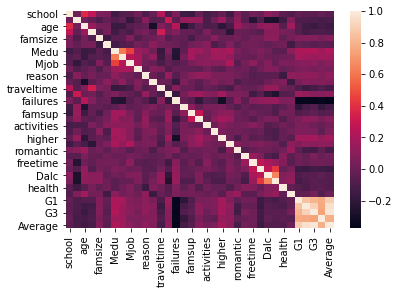

In [11]:
sns.heatmap(data_mat.corr())

In [12]:
data_mat.corr()['Average'].sort_values(ascending=False)

Average       1.000000
G3            0.979771
G2            0.957525
G1            0.892353
Result        0.789458
Medu          0.224048
higher        0.189007
Fedu          0.170434
studytime     0.124864
reason        0.121681
internet      0.102269
Mjob          0.101201
paid          0.093944
famsize       0.082914
guardian      0.071424
nursery       0.061690
Fjob          0.053464
activities    0.033903
famrel        0.030593
freetime      0.006026
absences      0.005879
school       -0.044159
Pstatus      -0.047820
famsup       -0.055469
Dalc         -0.067856
health       -0.075441
Walc         -0.078127
sex          -0.102660
address      -0.107745
romantic     -0.111625
schoolsup    -0.122630
traveltime   -0.126016
age          -0.143677
goout        -0.149407
failures     -0.374394
Name: Average, dtype: float64

### Train and Test

In [13]:
x = data_mat[['Medu', 'failures', 'higher', 'G1', 'G2']]
y = data_mat[['G3']]

In [14]:
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3) 
print('Xtrain Shape:', x_train.shape, '\nXtest Shape:', x_test.shape, '\nYtrain Shape:' ,y_train.shape, '\nYtest Shape:', y_test.shape)

Xtrain Shape: (276, 5) 
Xtest Shape: (119, 5) 
Ytrain Shape: (276, 1) 
Ytest Shape: (119, 1)


In [15]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [16]:
from sklearn.metrics import mean_squared_error, r2_score
print("\nCoefficient:", model.coef_)
print("\nIntercept:", model.intercept_)
print("\nMean Squared Error: %.2f " % mean_squared_error(y_test, y_pred))
print("\nR-Squared: %.2f " % r2_score(y_test, y_pred))


Coefficient: [[ 0.14167795 -0.04575331  0.53969811  0.14822771  0.97799144]]

Intercept: [-2.57995044]

Mean Squared Error: 3.09 

R-Squared: 0.83 


In [17]:
for i in range(10):
    print("Prediction: ", y_pred[i], "\tReal Value: ", y_test.values[i])

Prediction:  [8.52075382] 	Real Value:  [10]
Prediction:  [6.1443151] 	Real Value:  [9]
Prediction:  [8.36597635] 	Real Value:  [8]
Prediction:  [8.08917022] 	Real Value:  [10]
Prediction:  [12.43926933] 	Real Value:  [12]
Prediction:  [11.17883166] 	Real Value:  [12]
Prediction:  [9.65352273] 	Real Value:  [10]
Prediction:  [7.63868702] 	Real Value:  [8]
Prediction:  [12.18931691] 	Real Value:  [12]
Prediction:  [13.86849366] 	Real Value:  [13]
